In [7]:
"""
@author: Celine Soeiro

@description: Izhikevich Model

The Izhikevich model can be represented through an 2-D system of differential
equations:

    dvdt = 0.04*v*v + 5*v + 140 - u + I
    dudt = a*(b*v - u)

    with conditions:
        if v >= 30mV, then v = c and u = u + d

    for excitatory neurons:
        (ai,bi) = (a,b)
        (ci,di) = (c,d) + (15, -6)r**2
    for inhibitory neurons:
        (ai,bi) = (a,b) + (0.08, -0.05)*r
        (ci,di) = (c,d)

    u: Equation variable - Represents membrane recovery variable
    v: Equation variable - Represents membrane potential of the neuron
    a: Equation parameter - Time scale of the recovery variable u
    b: Equation parameter - Sensitivity of u to the fluctuations in v
    c: Equation parameter - After-spike reset value of v
    d: Equation parameter - After-spike reset value of u

    excitatory_neurons: Number of excitatory neurons
    inhibitory_neurons: Number of inhibitory neurons
    excitatory_vector: Column vector of excitatory neurons
    inhibitory_vector: Column vector of inhibitory neurons
"""

import numpy as np
import matplotlib.pyplot as plt
from random import seed, random

def izhikevich_neuron(
        params: dict,
        neuron_type: str,
        voltage_pick: float,
        simulation_time: int,
        time_step: float,
        current_value: int,
        current_start: int,
        current_finish: int,
        neurons = 1,
        initial_voltage = -65,
        ):

    # Time grid
    time = np.arange(0, simulation_time + time_step, time_step)

    # Check if paramaters exists, if dont display error msg
    if (not params.get('a')
        or not params.get('b')
        or not params.get('c')
        or not params.get('d')
        ):
        return 'Parameters must be a, b, c and d'

    # Parameters according Izhikevich article
    seed(1)
    random_factor = random()

    if (neuron_type == 'excitatory' or 'excit'):
        a = params['a']
        b = params['b']
        c = params['c'] + 15*random_factor**2
        d = params['d'] - 6*random_factor**2
    elif (neuron_type == 'inhibitory' or 'inhib'):
        a = params['a'] + 0.08*random_factor
        b = params['b'] - 0.05*random_factor
        c = params['c']
        d = params['d']
    else:
        return 'Neuron type must be excitatory or inhibitory'

    # Current vector input
    I = np.zeros(len(time))

    if (current_finish == -1):
        I[:] = current_value
    else:
        I[current_start:current_finish] = current_value

    # membrane potential vector
    v = np.zeros(len(time))
    v[0] = initial_voltage

    # membrane recovery variable vector
    u = np.zeros(len(time))
    u[0] = b*v[0]

    # Izhikevich neuron equations
    def dvdt(v, u, I):
        return 0.04*v**2 + 5*v + 140 - u + I

    def dudt(v,u):
        return a*(b*v - u)

    # when the neuron fired vector
    fired = []

    for t in range(1, len(time)):
        v_aux = v[t - 1]
        u_aux = u[t - 1]
        I_aux = I[t - 1]

        if (v_aux >= voltage_pick):
            v_aux = v[t]
            v[t] = c
            u[t] = u_aux + d
            fired.append(t)

        else:
            # solve using Euler
            dv = dvdt(v_aux, u_aux, I_aux)
            du = dudt(v_aux, u_aux)
            v[t] = v_aux + dv*time_step
            u[t] = u_aux + du*time_step

            # solve using RK 4th order

            # dv1 = time_step * dvdt(vc, uc, Ic)
            # dv2 = time_step * dvdt(vc + dv1 * 0.5, uc, Ic)
            # dv3 = time_step * dvdt(vc + dv2 * 0.5, uc, Ic)
            # dv4 = time_step * dvdt(vc + dv3, uc, Ic)
            # v[t] = 1/6 * (dv1 + 2*(dv2 + dv3) + dv4)

            # du1 = time_step * dudt(vc, uc)
            # du2 = time_step * dudt(vc, uc + du1 * 0.5)
            # du3 = time_step * dudt(vc, uc + du2 * 0.5)
            # du4 = time_step * dudt(vc, uc + du3)
            # u[t] = 1/6 * (du1 + 2*(du2 + du3) + du4)

    # return membrane potential and input current
    return v, I,u



In [5]:
params = {'a': 0.02, 'b': 0.2, 'c': -65, 'd': 8}
neuron_type = 'excit'
current_value = 10
current_start = 100
current_finish = 900
voltage_pick = 30
simulation_time = 100
time_step = 0.1
neurons = 1

In [8]:
v,I,u = izhikevich_neuron(params,neuron_type,voltage_pick,simulation_time,time_step,current_value,current_start,current_finish,neurons)

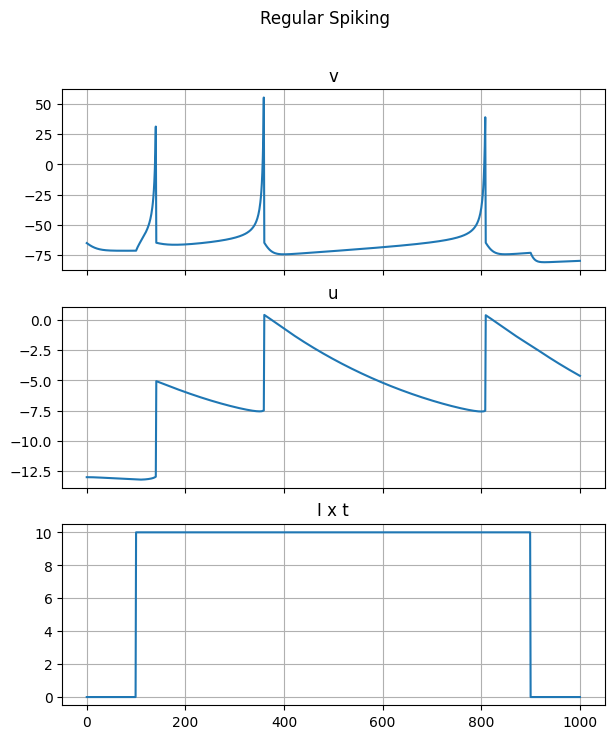

In [9]:
fig, axs = plt.subplots(3, sharex=True, figsize=(7,8))
fig.suptitle("Regular Spiking")
axs[0].plot(v)
axs[0].set_title('v')
axs[0].grid()

axs[1].plot(u)
axs[1].set_title('u')
axs[1].grid()

axs[2].plot(I)
axs[2].set_title('I x t')
axs[2].grid()